In [308]:
import pandas as pd

In [309]:
df=pd.read_csv("static/data/bond_girls_data.csv")

In [310]:
df.columns

Index(['bond_girl_name', 'actress_age', 'film_title', 'film_release_year',
       'bond_actor', 'bond_actor_age', 'director_name', 'box_office_actual_$',
       'box_office_adjusted_2005_$', 'budget_actual_$',
       'budget_adjusted_2005_$'],
      dtype='object')

In [311]:
df = df.drop(['director_name', 'box_office_actual_$',
       'box_office_adjusted_2005_$', 'budget_actual_$',
       'budget_adjusted_2005_$'], axis = 1)


In [312]:
# calculate average age
average = df.groupby(['film_release_year','bond_actor','bond_actor_age'])['actress_age'].mean()

In [313]:
bond_girls = pd.merge(df, average, how="outer", on = "film_release_year")

In [314]:
bond_girls.columns

Index(['bond_girl_name', 'actress_age_x', 'film_title', 'film_release_year',
       'bond_actor', 'bond_actor_age', 'actress_age_y'],
      dtype='object')

In [315]:
bond_girls.rename(columns = {'actress_age_x': 'actress_age', 'actress_age_y':'average_girl_age'}, inplace=True)

In [316]:
bond_girls['bond_actor'] = bond_girls['bond_actor'].str.strip()

In [317]:
bond_girls.columns

Index(['bond_girl_name', 'actress_age', 'film_title', 'film_release_year',
       'bond_actor', 'bond_actor_age', 'average_girl_age'],
      dtype='object')

In [318]:
bond_girls['bond_actor_age'] = bond_girls.bond_actor_age + 1 -1

In [319]:
bond_girls['actress_age'] = bond_girls.actress_age + 1 -1

In [320]:
bond_girls['year']=bond_girls['film_release_year']

In [321]:
bond_girls['actor'] = bond_girls['bond_actor'].str.strip()

In [322]:
bond_girls['actress'] = bond_girls['bond_girl_name'].str.strip()

In [323]:
bond_girls = bond_girls.drop(columns=['bond_actor','bond_girl_name','film_release_year'])

In [339]:
bond_girls['difference'] = (bond_girls.bond_actor_age - bond_girls.actress_age).astype("int")
bond_girls['diff_avg'] = (bond_girls.bond_actor_age - bond_girls.average_girl_age).astype("int")

In [341]:
bond_girls.to_csv("assets/data/bond_girls.csv", index=False)

In [340]:
bond_girls.describe()

,actress_age,bond_actor_age,average_girl_age,year,difference,diff_avg
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,28.915493,43.140845,28.915493,1983.169014,14.225352,13.873239
std,5.546547,7.841822,3.524390,17.592195,8.176966,6.989645
min,21.000000,30.000000,23.333333,1962.000000,-5.000000,1.000000
25%,24.000000,36.000000,26.666667,1967.000000,9.500000,9.000000
50%,28.000000,43.000000,28.600000,1979.000000,13.000000,13.000000
75%,33.000000,49.000000,30.333333,1997.000000,20.500000,19.000000
max,51.000000,58.000000,40.500000,2021.000000,31.000000,27.000000


<AxesSubplot:>

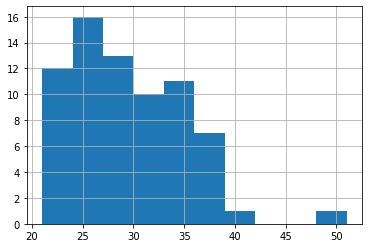

In [327]:
import matplotlib.pyplot as plt
bond_girls["actress_age"].hist()


In [328]:
bond_girls.loc[bond_girls["actress_age"]>bond_girls["bond_actor_age"]]

,actress_age,film_title,bond_actor_age,average_girl_age,year,actor,actress,difference,diff_avg
1,36,Dr. No,32,31.000000,1962,Sean Connery,Zena Marshall,-4,1.000000
2,35,From Russia with Love,33,26.333333,1963,Sean Connery,Eunice Gayson,-2,6.666667
10,39,Goldfinger,34,28.600000,1964,Sean Connery,Honor Blackman,-5,5.400000
19,31,On Her Majesty's Secret Service,30,26.666667,1969,George Lazenby,Diana Rigg,-1,3.333333
66,51,Spectre,47,40.500000,2015,Daniel Craig,Monica Bellucci,-4,6.500000


In [329]:
bond_girls.loc[bond_girls["actress_age"]>40]

,actress_age,film_title,bond_actor_age,average_girl_age,year,actor,actress,difference,diff_avg
66,51,Spectre,47,40.5,2015,Daniel Craig,Monica Bellucci,-4,6.5


In [330]:
bond_girls.loc[bond_girls["actress_age"]<24]

,actress_age,film_title,bond_actor_age,average_girl_age,year,actor,actress,difference,diff_avg
3,21,From Russia with Love,33,26.333333,1963,Sean Connery,Daniela Bianchi,12,6.666667
4,23,From Russia with Love,33,26.333333,1963,Sean Connery,Aliza Gur,10,6.666667
8,23,Thunderball,35,24.200000,1965,Sean Connery,Molly Peters,12,10.800000
9,22,Thunderball,35,24.200000,1965,Sean Connery,Maryse Guy Mitsouko,13,10.800000
12,23,Goldfinger,34,28.600000,1964,Sean Connery,Tania Mallet,11,5.400000
14,21,Goldfinger,34,28.600000,1964,Sean Connery,Margaret Nolan,13,5.400000
26,22,Live and Let Die,46,23.333333,1973,Roger Moore,Jane Seymour,24,22.666667
40,23,For Your Eyes Only,54,26.666667,1981,Roger Moore,Lynn Holly Johnson,31,27.333333
47,22,Licence to Kill,43,25.000000,1989,Timothy Dalton,Talisa Soto,21,18.000000
53,23,Tomorrow Never Dies,44,30.333333,1997,Pierce Brosnan,Cecilie Thomsen,21,13.666667


In [331]:

bond_girls.describe()

,actress_age,bond_actor_age,average_girl_age,year,difference,diff_avg
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,28.915493,43.140845,28.915493,1983.169014,14.225352,14.225352
std,5.546547,7.841822,3.524390,17.592195,8.176966,6.965624
min,21.000000,30.000000,23.333333,1962.000000,-5.000000,1.000000
25%,24.000000,36.000000,26.666667,1967.000000,9.500000,9.000000
50%,28.000000,43.000000,28.600000,1979.000000,13.000000,13.000000
75%,33.000000,49.000000,30.333333,1997.000000,20.500000,19.666667
max,51.000000,58.000000,40.500000,2021.000000,31.000000,27.333333


In [332]:
bond_girls['actor'].unique()


array(['Sean Connery', 'George Lazenby', 'Roger Moore', 'Timothy Dalton',
       'Pierce Brosnan', 'Daniel Craig'], dtype=object)